In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image_path = "/content/vtoh9fje.png"
image = cv2.imread(image_path)


In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

In [ ]:
# Apply adaptive thresholding
thresholded_image = cv2.adaptiveThreshold(
    blurred_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

In [ ]:
# Post-processing: Dilation followed by Erosion
kernel = np.ones((3, 3), np.uint8)  # Create a 3x3 kernel
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=2)  # Dilate to fill gaps
eroded_image = cv2.erode(dilated_image, kernel, iterations=2)  # Erode to remove noise

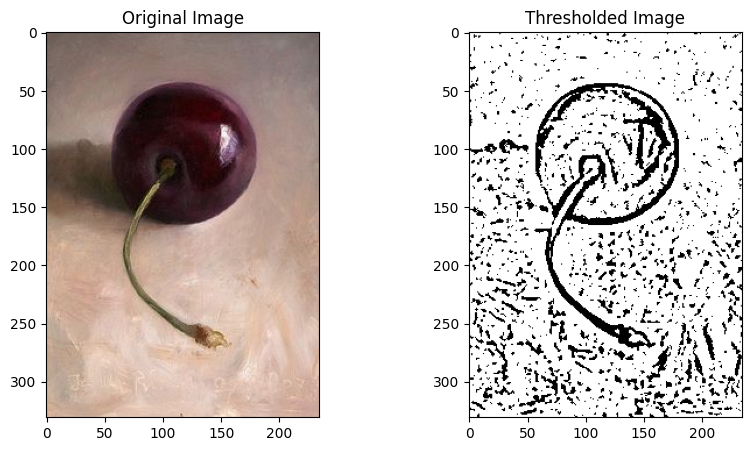

In [ ]:
# Display original and thresholded image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.show()